In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path().resolve().parent
sys.path.insert(0, str(PROJECT_ROOT))

In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from ultralytics import YOLO

In [3]:
RUN_DIR = PROJECT_ROOT / "models" / "runs" / "fruitninja_yolo11n"
BEST = RUN_DIR / "weights" / "best.pt"
DATA_YAML = PROJECT_ROOT / "datasets" / "fruitninja_yolo" / "data.yaml"

In [4]:
model = YOLO(BEST)
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_

In [5]:
results_csv = RUN_DIR / "results.csv"
df = pd.read_csv(results_csv)
df.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,4.54250,1.49085,3.93774,1.36826,0.00496,0.91176,0.01087,0.00518,1.04948,3.47034,1.00492,0.000050,0.000050,0.000050
1,2,5.65350,1.40009,3.86112,1.23826,0.00566,0.97059,0.20044,0.04474,0.98761,3.36804,0.94708,0.000114,0.000114,0.000114
2,3,6.71454,1.41121,3.37076,1.20110,0.00584,1.00000,0.27167,0.13659,1.08836,3.27541,0.97693,0.000176,0.000176,0.000176
3,4,7.71354,1.28660,2.89010,1.09355,0.00559,1.00000,0.38812,0.20417,1.07743,3.16170,0.95970,0.000235,0.000235,0.000235
4,5,8.64496,1.23764,2.48122,1.09330,0.00568,1.00000,0.48530,0.23753,1.08654,3.12704,0.97472,0.000292,0.000292,0.000292


In [6]:
df.tail()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
45,46,53.1422,0.74547,1.09521,0.89323,0.85453,0.97059,0.96286,0.59459,1.10719,0.89237,1.08060,0.000182,0.000182,0.000182
46,47,54.1354,0.75093,1.06383,0.92640,0.88171,0.94118,0.96545,0.60913,1.07178,0.85568,1.08024,0.000149,0.000149,0.000149
47,48,55.0294,0.70083,1.05087,0.90855,0.88308,0.94118,0.96893,0.62257,1.02815,0.84388,1.06894,0.000116,0.000116,0.000116
48,49,55.9344,0.74507,1.06743,0.92453,0.88466,0.94118,0.96893,0.62220,1.00880,0.82432,1.06469,0.000083,0.000083,0.000083
49,50,56.8311,0.67812,1.01063,0.91569,0.88479,0.94118,0.96893,0.62505,0.99856,0.81569,1.06299,0.000050,0.000050,0.000050


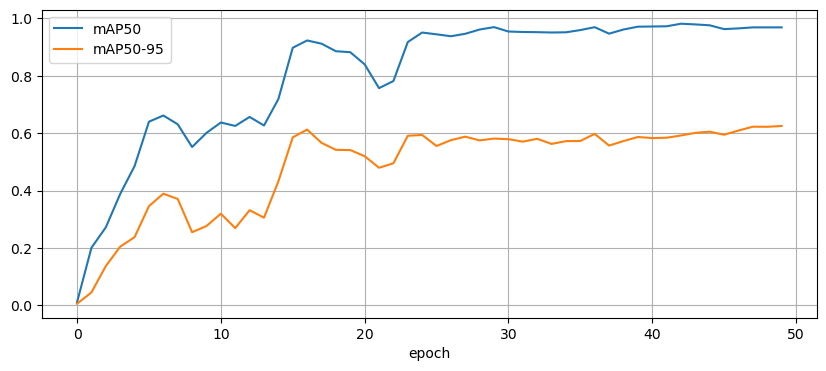

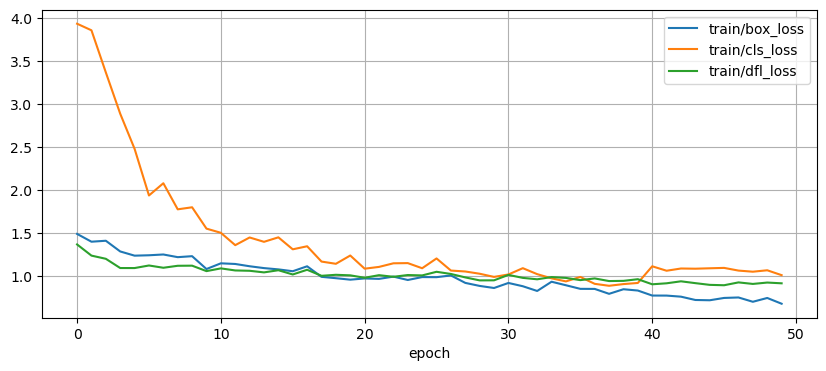

In [7]:
plt.figure(figsize=(10,4))
plt.plot(df["metrics/mAP50(B)"], label="mAP50")
plt.plot(df["metrics/mAP50-95(B)"], label="mAP50-95")
plt.xlabel("epoch")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(df["train/box_loss"], label="train/box_loss")
plt.plot(df["train/cls_loss"], label="train/cls_loss")
plt.plot(df["train/dfl_loss"], label="train/dfl_loss")
plt.xlabel("epoch")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
val_metrics = model.val(data=str(DATA_YAML), split="val")
val_metrics

Ultralytics 8.3.248  Python-3.11.14 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 4060, 8187MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients
val: Fast image access  (ping: 0.30.4 ms, read: 20.55.3 MB/s, size: 21.7 KB)
val: Scanning C:\Users\Pichau\Desktop\Programacao\FruitNAI\datasets\fruitninja_yolo\labels\val.cache... 14 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 14/14 9.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 4.7it/s 0.2s
                   all         14         23      0.885      0.941      0.969      0.624
                 fruit         11         17      0.928      0.882      0.966      0.756
                  bomb          5          6      0.842          1      0.972      0.493
Speed: 2.2ms preprocess, 5.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to C:\Users\Pichau\Desktop\Programacao\FruitNAI\notebooks\runs\detect\val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000022D95FA72D0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

In [9]:
def predict_and_show(model, image_paths, conf=0.25, imgsz=640):
    n = len(image_paths)
    cols = 3
    rows = (n + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
    if rows == 1:
        axes = np.array([axes])

    for i in range(rows * cols):
        r = i // cols
        c = i % cols
        ax = axes[r, c]
        ax.axis("off")

        if i >= n:
            continue

        p = str(image_paths[i])
        results = model.predict(source=p, conf=conf, imgsz=imgsz, verbose=False)
        im = results[0].plot()  # ndarray BGR
        im = im[..., ::-1]      # BGR -> RGB

        ax.imshow(im)
        ax.set_title(Path(p).name)

    plt.tight_layout()
    plt.show()

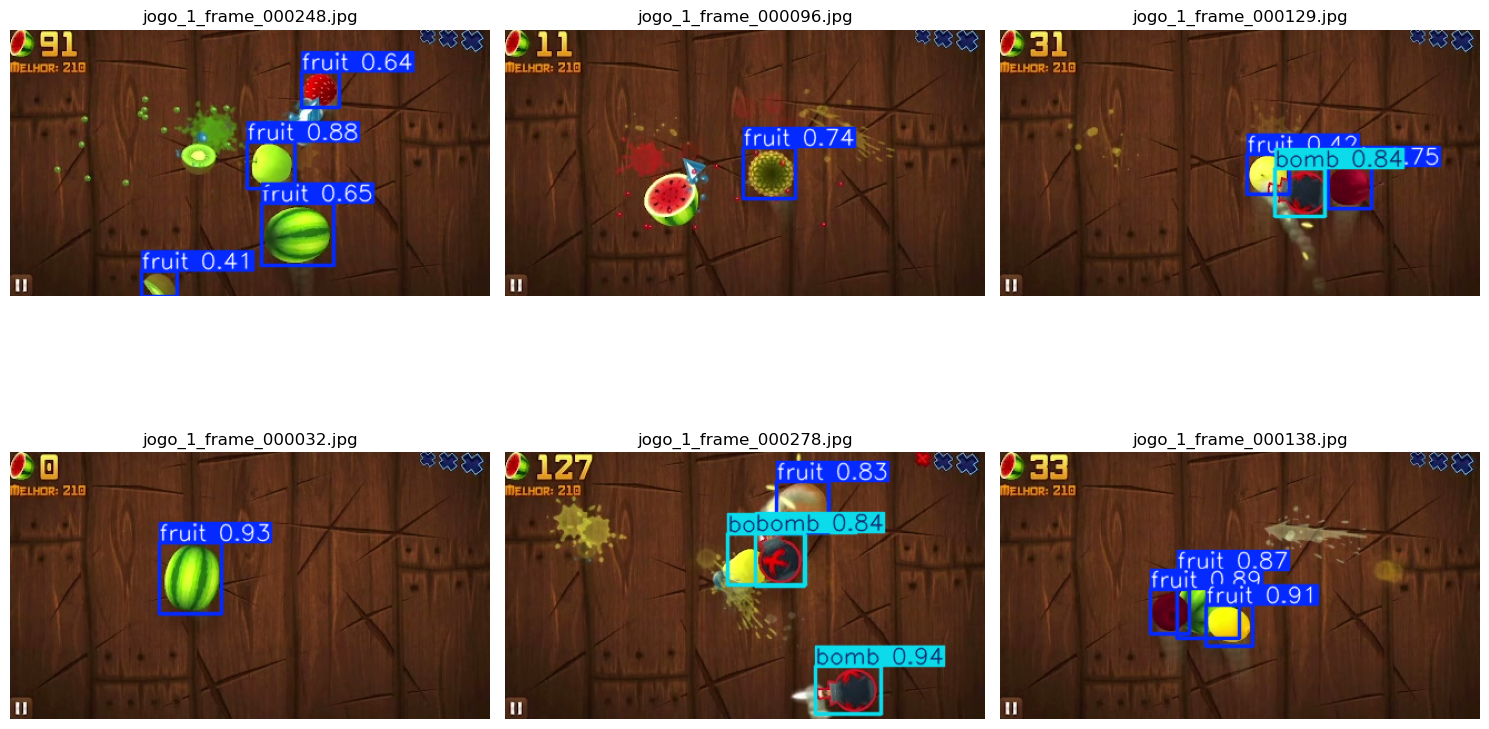

In [10]:
VAL_IMAGES_DIR = PROJECT_ROOT / "datasets" / "fruitninja_yolo" / "images" / "val"
val_imgs = sorted(list(VAL_IMAGES_DIR.glob("*.jpg")))
sample_imgs = random.sample(val_imgs, 6)
predict_and_show(model, sample_imgs, conf=0.25, imgsz=640)

In [ ]:
VIDEO = PROJECT_ROOT / "data" / "raw_videos" / "jogo_2.mp4"

model.predict(
    source=str(VIDEO),
    conf=0.25, 
    imgsz=640,
    show=True,
    save=True,
    project=RUN_DIR,
    name="inference_video"
)

WARNING 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

Results saved to C:\Users\Pichau\Desktop\Programacao\FruitNAI\models\runs\fruitninja_yolo11n\inference_video


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'fruit', 1: 'bomb'}
 obb: None
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 

In [ ]:
model.export(format="onnx", imgsz=640)

Ultralytics 8.3.248  Python-3.11.14 torch-2.5.1 CPU (AMD Ryzen 7 5700X 8-Core Processor)

PyTorch: starting from 'C:\Users\Pichau\Desktop\Programacao\FruitNAI\models\runs\fruitninja_yolo11n\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (5.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<2.0.0', 'onnxslim>=0.1.71', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ---------------------------------------- 0.0/16.5 MB ? eta -:--:--
   ----- ---------------------------------- 2.4/16.5 MB 12.3 MB/s eta 0:00:02
   ----------- ---------------------------- 4.7/16.5 MB 11.9 MB/s eta 0:00:01
   ----------------- ---------------------- 7.1/16.5 MB 11.8 MB/s eta 0:00:01
   ---------------------- ----------------- 9.4/16.5 MB 11.7 MB/s eta 0:00:01
   ---------------------------- ----------- 11.8/16.5 MB 11.7 MB/s eta 0:00:01
   ---------------------------------- ----- 14.2/16.5 MB 11.7 MB/s eta 0:00:01
   -------------------------------

'C:\\Users\\Pichau\\Desktop\\Programacao\\FruitNAI\\models\\runs\\fruitninja_yolo11n\\weights\\best.onnx'